<a href="https://colab.research.google.com/github/OlhaZahrebelna/Analysis_of_social_networks/blob/main/Analysis_of_social_networksENG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this analysis, we explore user interaction with content on various social platforms: YouTube, Facebook, Instagram and TikTok. The study is based on a dataset that contains 10,525 entries with information about likes, comments, layers, views and other metrics. The goal is to identify the main trends and relationships between these indicators for different platforms.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

**Download our dataset**

In [2]:
file_path = '/content/test_sample (1).csv'

try:
    df = pd.read_csv(file_path, sep=None, engine='python')
    success = True
except Exception as e:
    success = False
    error = str(e)

display(success)
display(error if not success else df.head())

True

,platform,account_id,id,created_time,text_original,text_additional,likes_count,shares_count,comments_count,views_count
0,Instagram,59141296785,C_00PPctR-o,2024-09-12 17:20:36.000000 +00:00,NaN,NaN,222.0,NaN,34.0,NaN
1,Instagram,60554087008,C_00W8KttVv,2024-09-12 17:21:27.000000 +00:00,C’è un gruppo sulla parola di Dio sulla mia ho...,NaN,391.0,NaN,37.0,NaN
2,Instagram,62605500679,C_026U_t3We,2024-09-12 17:43:38.000000 +00:00,𝐒𝐮𝐥 𝐦𝐢𝐨 𝐩𝐫𝐨𝐟𝐢𝐥𝐨 𝐜‘𝐞̀ 𝐮𝐧 𝐠𝐫𝐮𝐩𝐩𝐨 𝐝𝐢 𝐬𝐭𝐮𝐝𝐢𝐨 𝐬𝐮𝐥𝐥𝐚...,NaN,9.0,NaN,3.0,NaN
3,Instagram,58741537308,C_05B3hCYQn,2024-09-12 18:02:08.000000 +00:00,#Monza\n#Padova\n#Lecce\n#Latina\n#paroladelsi...,NaN,78.0,NaN,15.0,NaN
4,Instagram,58741537308,C_0BfOLiqRS,2024-09-12 09:57:22.000000 +00:00,#Monza\n#Padova\n#Lecce\n#Latina\n#paroladelsi...,NaN,129.0,NaN,16.0,NaN


**See what columns has our data set**

In [3]:
df.columns

Index(['platform', 'account_id', 'id', 'created_time', 'text_original',
       'text_additional', 'likes_count', 'shares_count', 'comments_count',
       'views_count'],
      dtype='object')

**platform**: The name of the platform on which the content is published (e.g. YouTube, Facebook, Instagram, TikTok). This column allows you to categorize entries by platform and compare activity on different social networks.

**account_id**: Identifier of the account of the user who posted the content. This allows you to track the activity of specific users and their impact on interaction with content.

**id**: Unique identifier of the post or record in the dataset. Used to uniquely identify each record.

**created_time**: Time of content publication. This value allows you to analyze the activity of users at different times of the day or on different days of the week, as well as identify seasonal fluctuations.

**text_original**: The original text of the post or publication. This column contains the text part of the content and can be useful for analyzing the topics of posts or for performing text analysis.

**text_additional**: Additional text that may be part of the post, such as a description or hashtags. This text can be useful for advanced content analysis.

**likes_count**: Number of likes the post received. This column measures the level of approval or popularity of content among users.

**shares_count**: Number of times the post has been shared by other users. This indicates the level of distribution of content and its ability to attract a new audience.

**comments_count**: Number of comments left under the post. This indicator reflects the level of interaction and involvement of users in content discussions.

**views_count**: Number of views post. This is the number of times the content has been viewed, and this metric can help estimate audience reach.

**See what size the dataset has**

In [4]:
df.shape

(10525, 10)

The data has the form (10525, 10), which means that there are 10 columns and 10.525 rows in the data set. This gives us a large number of records to analyze, in particular to study the relationships between different metrics, such as the number of likes, comments, layers and views.

**Prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10525 entries, 0 to 10524
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         10525 non-null  object 
 1   account_id       10000 non-null  object 
 2   id               10047 non-null  object 
 3   created_time     10000 non-null  object 
 4   text_original    7660 non-null   object 
 5   text_additional  3 non-null      object 
 6   likes_count      9951 non-null   float64
 7   shares_count     5000 non-null   float64
 8   comments_count   9908 non-null   float64
 9   views_count      5621 non-null   float64
dtypes: float64(4), object(6)
memory usage: 822.4+ KB


**Conclusion:**

The dataset contains 10,525 entries with information on different platforms, but some columns have missing data. For example, the "platform" column has no missing values, but other columns like "account_id" and "text_additional" have a significant amount of missing data. The "shares_count" and "views_count" columns have especially high numbers of missing entries. This suggests that more cleaning and handling of missing values will be needed before performing further analysis. Additionally, some columns are numeric, while others are text-based, which will require different types of processing to make the data usable for analysis.

**Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.**

In [6]:
df.describe()

,likes_count,shares_count,comments_count,views_count
count,9951.000000,5000.000000,9908.000000,5.621000e+03
mean,1414.377851,79.232000,299.861122,1.797353e+04
std,5989.211037,979.564848,1259.439901,1.012492e+05
min,0.000000,0.000000,0.000000,3.000000e+00
25%,116.000000,3.000000,28.000000,1.539000e+03
50%,354.000000,9.000000,93.000000,3.704000e+03
75%,895.000000,43.000000,261.000000,8.535000e+03
max,188611.000000,47500.000000,80415.000000,3.500000e+06


**Conclusion:**

Likes Count: On average, each entry gets 1,414 likes, but the numbers can vary a lot (from 0 to 188,611). This shows that some posts get much more attention than others.
Shares Count: The average number of shares is 79, but there is a big difference in how shares are spread out (from 0 to 47,500).
Comments Count: The average number of comments is 300, but some posts have thousands of comments (ranging from 0 to 80,415).
Views Count: On average, posts get about 17,973,353 views, but this varies greatly (from just 3 to 3.5 million views).
In general, the data shows a lot of differences in how posts get likes, shares, comments, and views.

**Сlean the data**
Data cleaning is carried out in order to remove all lines where there are no values in the likes_count and comments_count columns. This is important because for proper analysis we need data in these columns. If these columns have missing values (NaN), the analysis may be inaccurate or cause errors, so we delete them.

In [7]:
df_cl_like_comments = df.dropna(subset=['likes_count', 'comments_count'])

**We check if the data has changed**

In [8]:
df_cl_like_comments.shape

(9908, 10)

**This plot will help you visually assess the relationship between the number of comments and likes.**

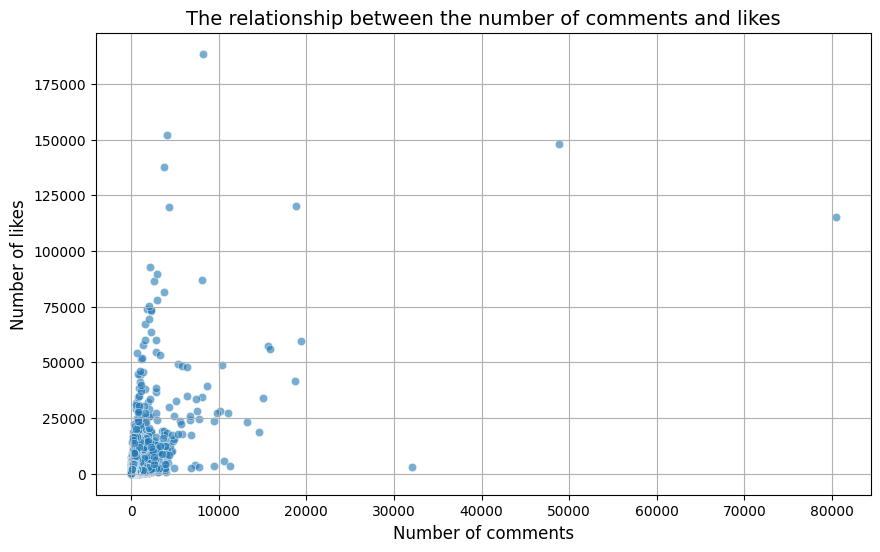

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cl_like_comments, x='comments_count', y='likes_count', alpha=0.6)
plt.title('The relationship between the number of comments and likes', fontsize=14)
plt.xlabel('Number of comments', fontsize=12)
plt.ylabel('Number of likes', fontsize=12)
plt.grid(True);

**Сonclusion**

On the scatterplot, we can observe a moderate positive correlation between the number of comments and the number of likes. This means that, generally, posts with more comments tend to also have more likes. However, it's important to note that this is not an absolute relationship. While the trend suggests a positive connection, the spread of points indicates that other factors, such as the quality of the content or the size of the audience, can also influence the number of likes. Thus, although the general pattern is positive, the relationship is not perfect, and some posts may deviate from this trend.

In [10]:
correlation = df_cl_like_comments['comments_count'].corr(df_cl_like_comments['likes_count'])
print(f"Correlation coefficient: {correlation:.2f}")

Correlation coefficient: 0.54


Moderate positive correlation: There is a tendency that more comments are associated with a higher number of likes. However, this is not an absolute relationship: other factors (such as content quality, audience) may influence the number of likes.

**Using the logarithm of comments and likes, we reduce the impact of extreme values and make the relationship between variables clearer, allowing a better understanding of trends without being overwhelmed by large values.**

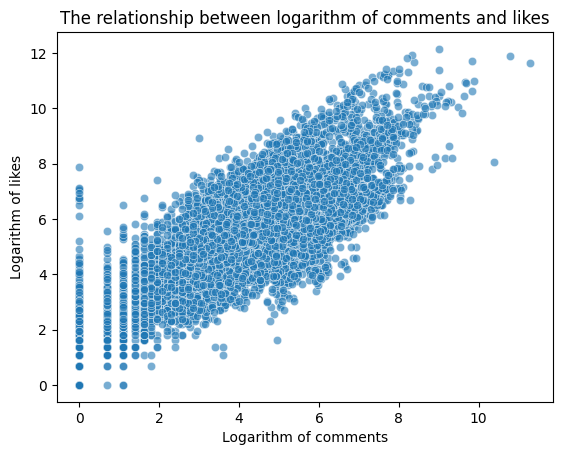

In [11]:
df_cl_like_comments = df_cl_like_comments.copy()

df_cl_like_comments.loc[:, 'log_comments'] = np.log1p(df_cl_like_comments['comments_count'])
df_cl_like_comments.loc[:, 'log_likes'] = np.log1p(df_cl_like_comments['likes_count'])

sns.scatterplot(data=df_cl_like_comments, x='log_comments', y='log_likes', alpha=0.6)
plt.title('The relationship between logarithm of comments and likes')
plt.xlabel('Logarithm of comments')
plt.ylabel('Logarithm of likes');


**Сonclusion**

Positive correlation: There is a tendency for a positive relationship between the number of comments and likes. The higher the logarithm of the number of comments, the higher the logarithm of the number of likes.

Data scatter: Although the overall trend is positive, there is some scatter, especially at lower values of the logarithm of comments. This may indicate the influence of other factors (such as content quality, relevance of the topic, etc.).

Logarithmic scale: Using a logarithmic scale reduces the impact of large values and better demonstrates the overall trend.

Point density: Higher point density is observed at lower values of the logarithms of comments and likes. This may indicate that most content has a small number of comments and likes.


**Аnalyzing the column 'platform'**

The purpose of analyzing this column is to understand the distribution and potential influence of various platforms and content types on the user interactions (likes, comments, shares, etc.).


In [12]:
df['platform'].unique()

array(['Instagram', 'Leggi la descrizione per saperne di più+',
       'Argomenti da discutere nel gruppo', '1-Perdono',
       '2. Ama il prossimo', '3- Liberati dal peccato e pentiti',
       '4. Come seguire la volontà di Dio',
       'Il link del gruppo può essere trovato nel mio profilo.',
       '5 Il mistero del ritorno del Signore',
       '6 Come prepararsi al ritorno di Gesù', '7. Il piano di Dio',
       '8. Distinguere i veri cristi da quelli falsi',
       '9 Come Dio completa l’opera di giudizio',
       'Il link del gruppo può essere trovato nel mio profilo. Leggi le istruzioni+',
       '10. 10 citazioni sul matrimonio',
       '11. Parole sull’educazione dei bambini',
       '12-Parole sulla liberazione dalle tentazioni di Satana.',
       'Il clink del  gruppo può essere trovato nel mio profilo. Leggi le istruzioni+',
       '#preghiere', '#preghiamoinsieme', '#preghieraquotidiana',
       '#preghieradellasera', '#preghieradelcuore',
       '#preghieradelmattino', ' #

**We see that the data is pretty dirty. Let's check what is most common.**

In [13]:
value_counts = df['platform'].value_counts()
print(value_counts)

platform
Instagram                                                                2500
YouTube                                                                  2500
Facebook                                                                 2500
TikTok                                                                   2500
#preghiere                                                                 26
                                                                         ... 
#basilicadisuperga                                                          1
#BasilicadiSantaMariaaPugliano #gesù #preghire                              1
#BasilicadiSanFrancesco                                                     1
#Chiesa                                                                     1
Unisciti al gruppo Whatsapp sulla mia home page per dirti la risposta       1
Name: count, Length: 79, dtype: int64


**We see that Instagram, TikTok, Facebook, YouTube are common. We will explore them exactly.**

In [14]:
valid_platforms = ['Instagram', 'TikTok', 'Facebook', 'YouTube']
df_filtered = df[df['platform'].isin(valid_platforms)]

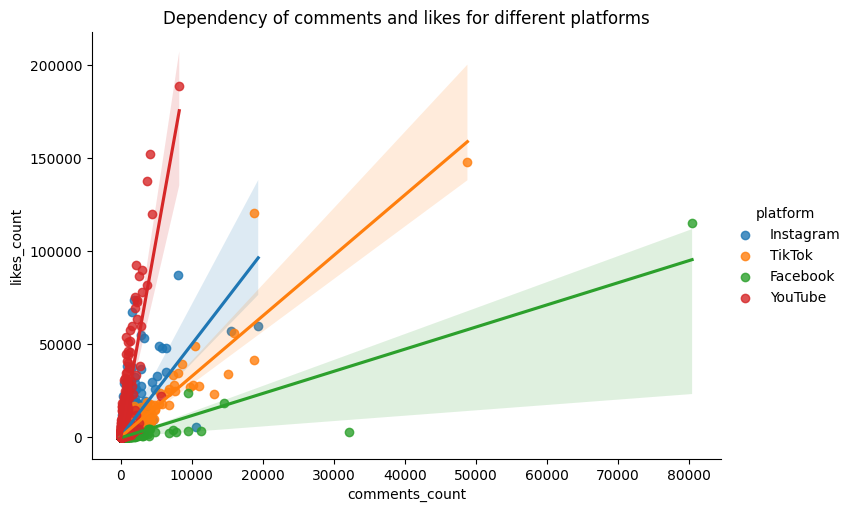

In [15]:
sns.lmplot(data=df_filtered, x='comments_count', y='likes_count', hue='platform', aspect=1.5)
plt.title('Dependency of comments and likes for different platforms');

**Сonclusion**

All platforms show a positive correlation between the number of comments and likes. On YouTube, it is noticeable that the number of likes significantly increases as the number of comments grows. In Instagram, this trend is also present, but more comments are needed to gain likes. TikTok seems to be the golden middle: likes grow evenly with the increase in comments. However, the situation is different on Facebook – even with a large number of comments, the number of likes remains the lowest. This may indicate that people tend to engage in conversations more often than liking posts on Facebook.

**let's convert the data type of created_time into the date format to extract more useful information for the analysis**

In [17]:
df_filtered.loc[:, 'created_time'] = pd.to_datetime(df_filtered['created_time'], format='mixed', errors='coerce')

**We add new columns to analyze our data.**

In [18]:
df_filtered['created_time'] = pd.to_datetime(df_filtered['created_time'], format='mixed', errors='coerce')

df_filtered.loc[:, 'day_of_week'] = df_filtered['created_time'].dt.dayofweek
df_filtered.loc[:, 'hour'] = df_filtered['created_time'].dt.hour
df_filtered.loc[:, 'month'] = df_filtered['created_time'].dt.month


In [19]:
df_time_analysis = df_filtered.groupby(['hour', 'day_of_week']).agg(
    avg_likes=('likes_count', 'mean'),
    avg_comments=('comments_count', 'mean'),
    count_posts=('id', 'count')
).reset_index()


**Heat map for likes by hour and day of the week.**

A heat map is a visual representation of user interaction data, where color intensity corresponds to the concentration of specific user actions on your website or app.

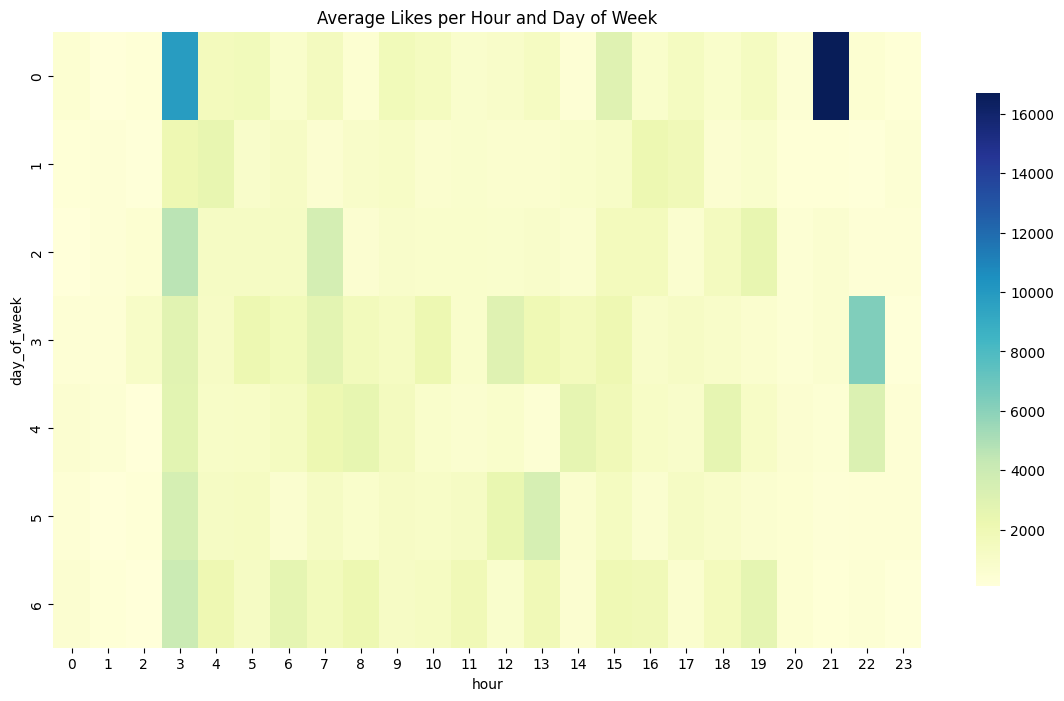

In [20]:
pivot_likes = df_time_analysis.pivot(index='day_of_week', columns='hour', values='avg_likes')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_likes, cmap="YlGnBu", annot=False, cbar_kws={'shrink': 0.8})
plt.title('Average Likes per Hour and Day of Week');


**Сonclusion**

The best time for publications, if the goal is the maximum number of likes, is Sunday in the early morning or at night.
During working days, user activity is more uniform and lower, but peaks may appear in the morning and early evening

**Heat map for comments by hour and day of the week**

A heat map is a visual representation of user interaction data, where color intensity corresponds to the concentration of specific user actions on your website or app.

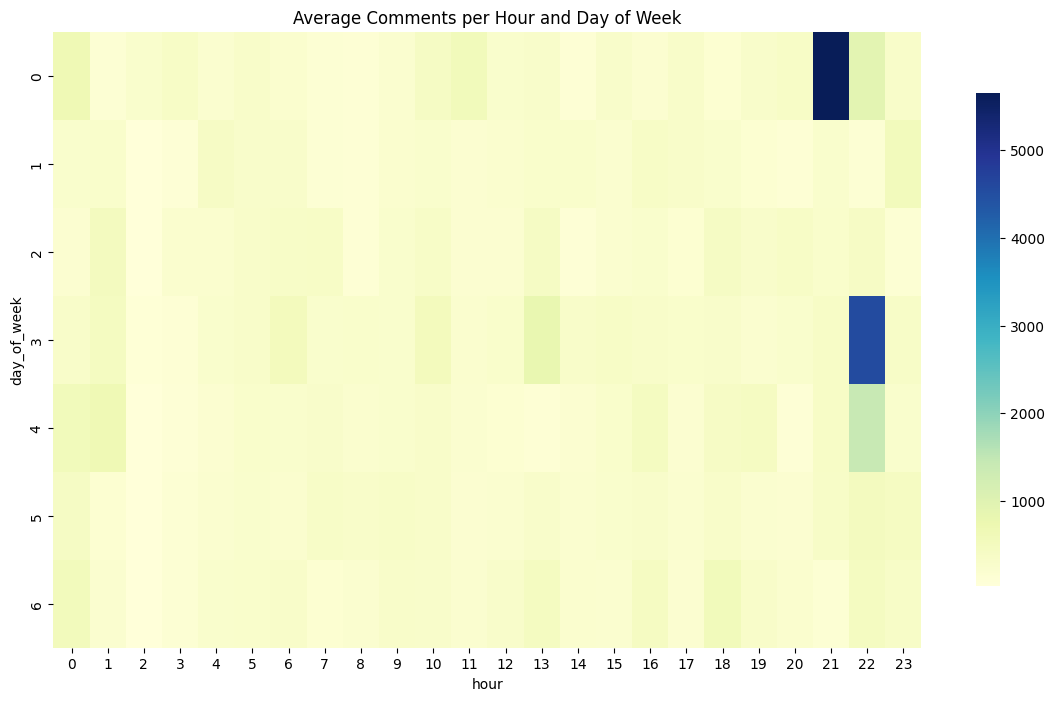

In [21]:
pivot_comments = df_time_analysis.pivot(index='day_of_week', columns='hour', values='avg_comments')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_comments, cmap="YlGnBu", annot=False, cbar_kws={'shrink': 0.8})
plt.title('Average Comments per Hour and Day of Week');


**Сonclusion**

The best time for publications, if the goal is the maximum number of comments, is Sunday night time or Wednesday night time.

In [22]:
df_platform_analysis = df_filtered.groupby(['platform']).agg(
    avg_likes=('likes_count', 'mean'),
    avg_comments=('comments_count', 'mean'),
    count_posts=('id', 'count')
).reset_index()

**The average number of likes on different platforms.**

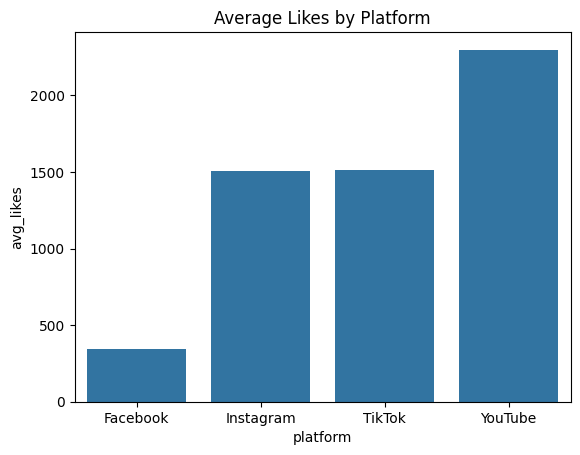

In [23]:
sns.barplot(x='platform', y='avg_likes', data=df_platform_analysis)
plt.title('Average Likes by Platform');

**Сonclusion**

YouTube has the highest number of likes: This may indicate that users actively engage with content on this platform, likely due to the longer video format, which allows for more detailed interaction with the content and provides more time for capturing attention.

Facebook has the lowest number of likes: This could suggest a decrease in user engagement on this platform, possibly due to changes in the audience or adjustments in algorithms that reduce the visibility of posts, or due to the different nature of content on Facebook compared to other platforms.

Instagram and TikTok have similar average values: This may indicate a similar level of user engagement on these platforms, which focus on short, fast-paced content (especially TikTok), generating a certain level of interaction.

Overall, it can be said that YouTube maintains high activity, Facebook shows a decline in activity, while Instagram and TikTok show a similar level of user engagement, albeit with different approaches to content.

**The average number of comments on different platforms.**

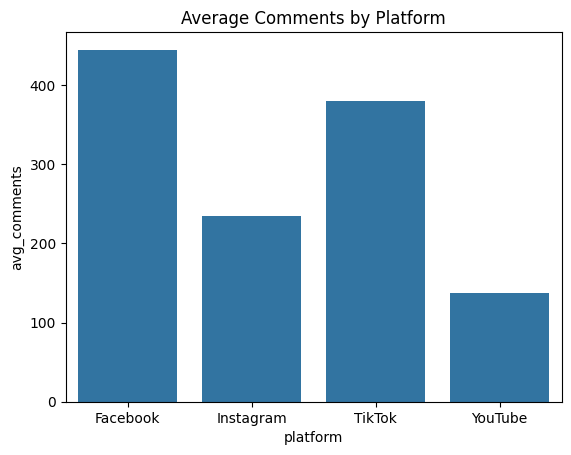

In [24]:
sns.barplot(x='platform', y='avg_comments', data=df_platform_analysis)
plt.title('Average Comments by Platform');

**Сonclusion**

Facebook and TikTok are the leaders in terms of comments: This suggests that users on these platforms are highly engaged in discussions, possibly because both platforms encourage interaction through comments. TikTok, with its short, viral videos, might prompt more conversations, while Facebook could see more discussions due to its long-established user base and diverse content types.

Instagram comes next: This indicates a moderate level of engagement through comments. While Instagram is also a highly interactive platform, it may rely more on visual content, with less emphasis on written interaction compared to Facebook and TikTok.

YouTube has the lowest number of comments: Despite YouTube having high likes, its comment count is lower, which could be because users primarily engage with the content by watching and liking videos rather than commenting. The platform's focus on long-form video content may also reduce the frequency of comments in comparison to short-form content on TikTok and Facebook.

In conclusion, Facebook and TikTok lead in comment engagement, Instagram shows a moderate level of interaction, and YouTube has a relatively lower number of comments, which reflects the differences in the platforms' content formats and user interaction styles.

From these charts, it can be said that on Facebook, users engage more in discussions. On YouTube, users are more likely to give likes, as the videos on this platform are more extensive.


**We also have interesting columns, such as 'shares_count' and 'views_count', which we can explore.**

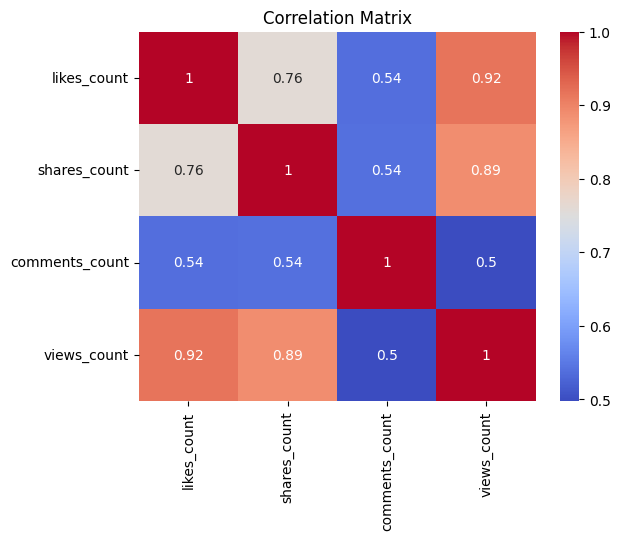

In [25]:
correlation_matrix = df_filtered[['likes_count', 'shares_count', 'comments_count', 'views_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix");

**Сonclusion**

Views have the strongest correlation with likes and reposts. This is logical, since more views usually lead to more engagement.
Comments show a weaker dependence on other indicators, which may indicate that their motivation is different or that they depend on other factors

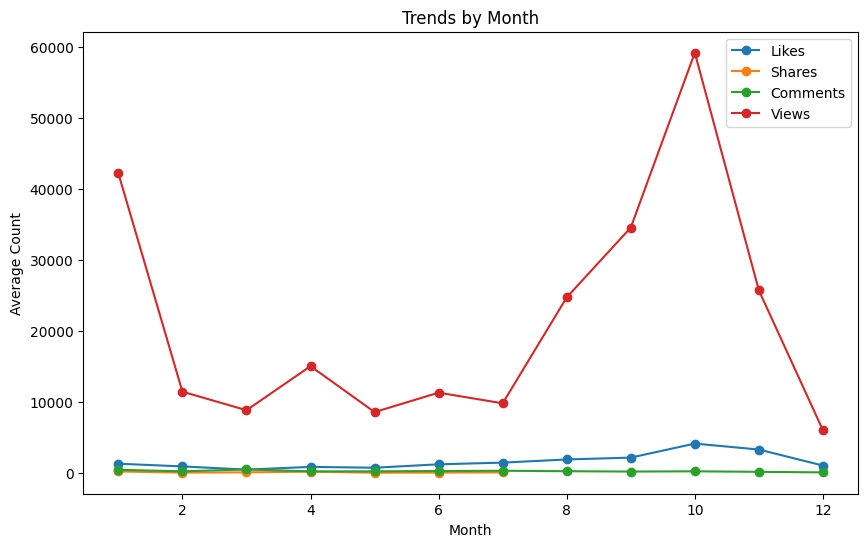

In [26]:
monthly_trend = df_filtered.groupby('month').agg({'likes_count': 'mean', 'shares_count': 'mean', 'comments_count': 'mean', 'views_count': 'mean'})
monthly_trend.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Trends by Month")
plt.ylabel("Average Count")
plt.xlabel("Month")
plt.legend(["Likes", "Shares", "Comments", "Views"]);


**Conclusion**

From the analysis, we can observe that the average values begin to increase starting in July and peak in November, after which they begin to decline. However, there is a slight increase in January. Interestingly, the share metric is visible from July to November, during non-trending months, but then the line disappears, which could indicate a shift in trends or audience activity.

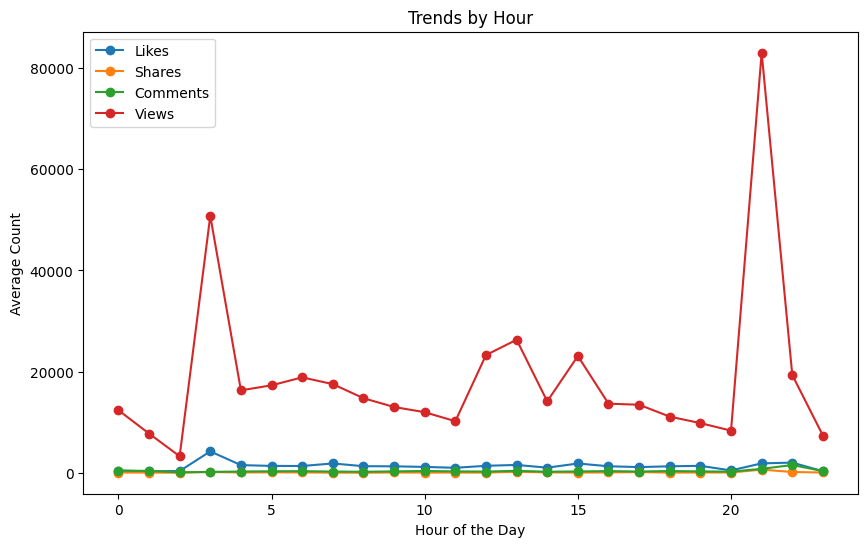

In [27]:
hourly_trend = df_filtered.groupby('hour').agg({'likes_count': 'mean', 'shares_count': 'mean', 'comments_count': 'mean', 'views_count': 'mean'})
hourly_trend.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Trends by Hour")
plt.ylabel("Average Count")
plt.xlabel("Hour of the Day")
plt.legend(["Likes", "Shares", "Comments", "Views"]);

**Conclusion**

 The analysis reveals user activity at 2:00 and 4:00 AM, which can be explained by the global reach of these social networks, as they are used by people from all over the world. Additionally, there is predictable activity between 8:00 PM and 10:00 PM, likely corresponding to the evening peak of user engagement. Furthermore, average activity is observed from 11:00 AM to 4:00 PM, which is likely to align with late morning and lunchtime hours in many regions.

# Model building (linear regression model, training, accuracy evaluation)

The model predicts likes_count based on comments_count and views_count.

**Feature and target variable preparation** is the stage where I defined which variables would be used to build the model:

* Features (X) are the variables used to predict the outcome.
In my case, I used the following features:
comments_count (number of comments),
views_count (number of views)
* Target variable (y) is the variable the model is supposed to predict. In my case, it is:
likes_count (number of likes).

In [28]:
df_filtered = df_filtered.dropna(subset=['likes_count', 'comments_count', 'views_count'])

In [29]:
X = df_filtered[['comments_count', 'views_count']]
y = df_filtered['likes_count']


**Splitting into training and test sets.**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Creates a linear regression model object and trains it on X_train and y_train.**

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Applies the model to the test data to predict likes (likes_count).**

In [32]:
y_pred = model.predict(X_test)

**Evaluates the model's performance:**

**MSE (Mean Squared Error)** – measures the average squared difference between predicted and actual values (the lower, the better).

**R²** (Coefficient of Determination) – indicates how well the model explains the data (the closer to 1, the better).

In [33]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [34]:
(model.coef_, model.intercept_, mse, r2)

(array([0.43514255, 0.06109449]),
 np.float64(536.1381243343849),
 10945746.955754915,
 0.7959280239330527)

* **coef_**: coefficients for comments_count and views_count — indicate the influence of each feature on the number of likes
* **intercept_**: the baseline number of likes when other features are 0
* **mse**: model error (Mean Squared Error)
* **r2**: model accuracy (R² score)

**Results:**

**+1 comment** ≈ +0.43 likes

**+1 view** ≈ +0.06 likes

**Baseline level** ≈ 536 likes (even with zero views and comments)

**Mean Squared Error** = 11 million likes — a large value, but:
**RMSE** ≈ 3300 likes, which means the average prediction error is about 3300 likes (due to large values in likes_count)

**R²** = 0.79 → the model explains 79% of the variation in likes, which indicates good performance

**The relationship between the number of likes and the number of comments**

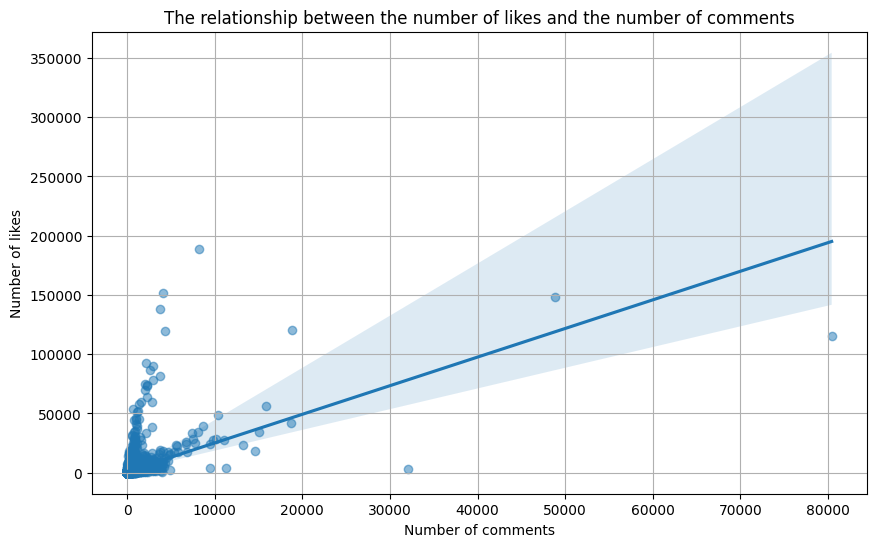

In [35]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_filtered, x='comments_count', y='likes_count', scatter_kws={'alpha':0.5})
plt.title('The relationship between the number of likes and the number of comments')
plt.xlabel('Number of comments')
plt.ylabel('Number of likes')
plt.grid(True)

**Conclusion:**

Comments are correlated with likes, although there are some outliers. The regression line shows the general trend, while the light-shaded area represents the confidence interval.

**Relationship between number of likes and number of views**

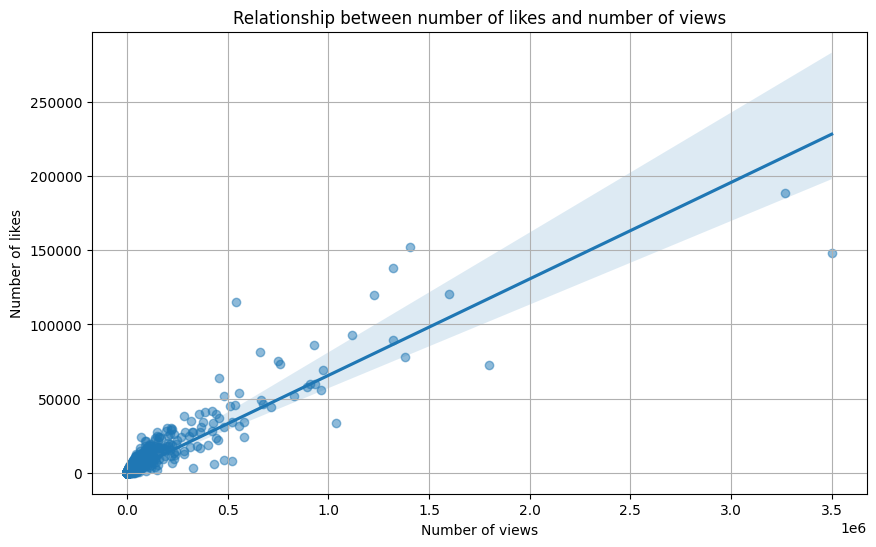

In [36]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_filtered, x='views_count', y='likes_count', scatter_kws={'alpha':0.5})
plt.title('Relationship between number of likes and number of views')
plt.xlabel('Number of views')
plt.ylabel('Number of likes')
plt.grid(True)

**Conclusion:**

There is a positive relationship (more views → more likes).
There are some outliers with a very high number of views and likes.

The regression line shows the general trend, while the light-shaded area represents the confidence interval.

**Overall conclusion of model:**

The model performs well and consistently. It explains most of the variation in the data (R² ≈ 0.79), and the influence of the main features is logically sound.

It can confidently be used as a baseline model for predicting post engagement on social media.

# Overall conclusion

**The analysis showed that users interact with content differently on each platform. For example, YouTube has many likes, but few comments, while on Facebook users comment more than like. Instagram and TikTok have similar activity, but approaches to content are different.**

**In terms of publication time, the most likes are given to posts that are published on Sunday mornings or nights, and the most comments are on Sunday and Wednesday evenings. The peak of activity is observed from July to November, after which activity decreases until January, but rises slightly this month.**

**Overall, Facebook and TikTok can be said to have the most comments and YouTube the most likes.**